In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import os

In [35]:
df_store = pd.read_csv(r"C:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\Data\Raw_Data\cleaned_Store_dataset.csv")
df_Train = pd.read_csv(r"C:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\Data\Train_Data\cleaned_Train_dataset.csv")
df_Test = pd.read_csv(r"C:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\Data\Test_Data\cleaned_Test_dataset.csv")
pd.set_option('display.max_columns', None)

C:\Users\ephre\AppData\Local\Temp\ipykernel_1724\1007221393.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Train = pd.read_csv(r"C:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\Data\Train_Data\cleaned_Train_dataset.csv")


In [36]:
sys.path.append(r'c:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\scripts')

from combined import visualize_promo_interval_distribution, chi_square_test, categorize_and_plot_holiday_sales, add_holiday_column, decompose_time_series, plot_decomposition, plot_moving_average, compare_holiday_non_holiday_sales, analyze_sales_customers_relationship, analyze_promotions, analyze_store_promotions, analyze_open_store_trends, analyze_weekday_open_stores_weekend_sales, analyze_sales_customers_by_day, analyze_promo_impact, get_stores_open_all_weekdays, compare_weekend_weekday_sales, plot_sales_comparison, plot_average_sales_by_assortment, analyze_competition_distance, analyze_city_center_sales, analyze_competitor_impact, create_features, Scaler, labelEncoder

### Check for distribution in both training and test sets

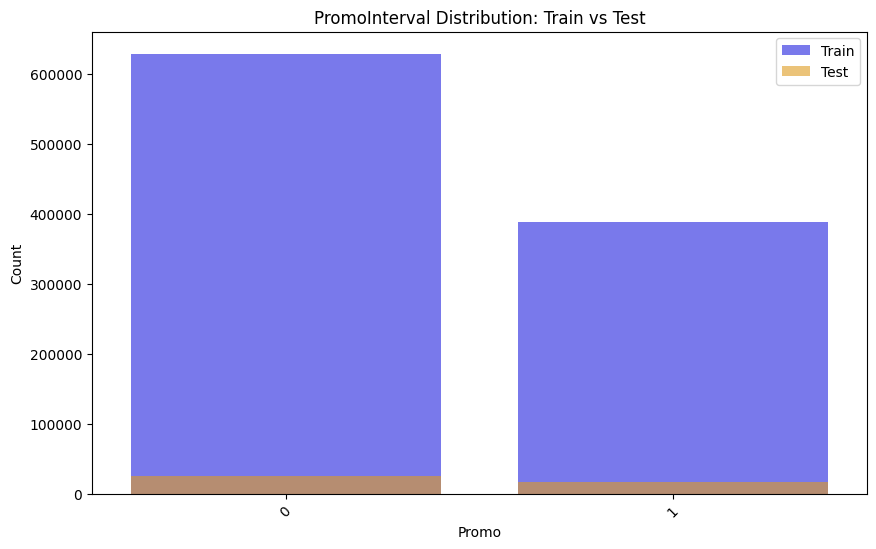

In [37]:
visualize_promo_interval_distribution(df_Train, df_Test, promo_column='Promo')


In [38]:
chi_square_test(df_Train, df_Test, promo_column='Promo')

### Check & compare sales behavior before, during, and after holidays


In [39]:
# # usage for StateHoliday and SchoolHoliday:
# categorize_and_plot_holiday_sales(df_Train, 'StateHoliday', days_before=3, days_after=3)
# categorize_and_plot_holiday_sales(df_Train, 'SchoolHoliday', days_before=3, days_after=3)


### seasonal (Christmas, Easter, etc) purchase behaviors

c:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\scripts\combined.py:140: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_train['IsHoliday'] = df_train.index.isin(holiday_list)


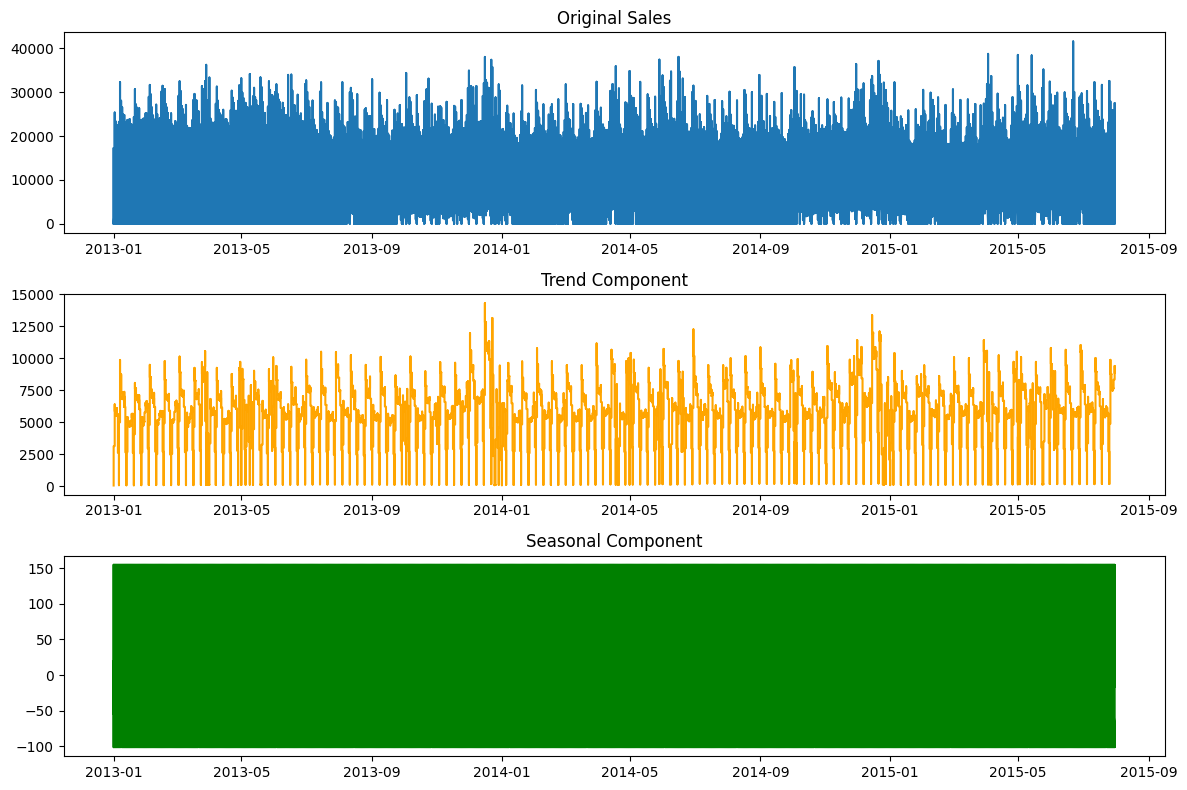

In [40]:
# Assuming df_Train has 'Date' and 'Sales' columns
df_Train['Date'] = pd.to_datetime(df_Train['Date'])
df_Train.set_index('Date', inplace=True)

# Add holiday column
df_Train = add_holiday_column(df_Train, country='US')

# Perform time series decomposition
decomposition = decompose_time_series(df_Train, column='Sales')

# Plot the decomposition results
plot_decomposition(decomposition, df_Train)

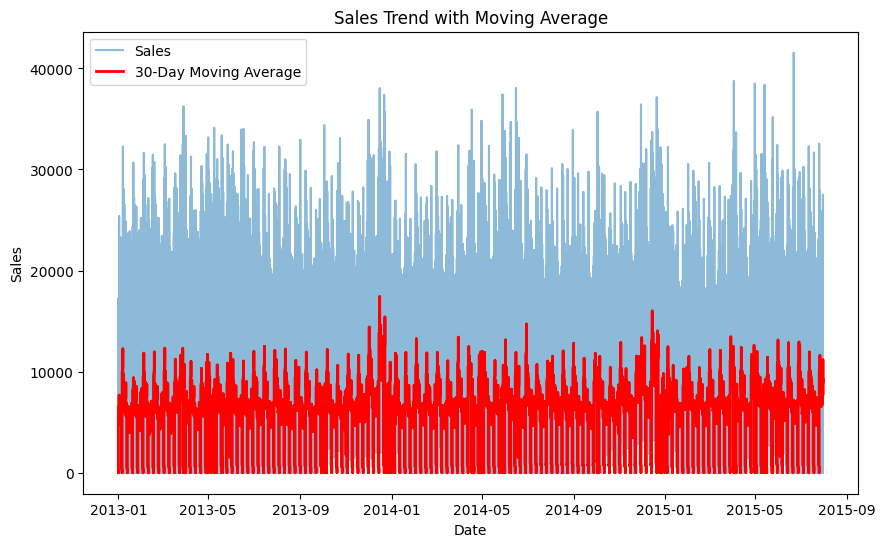

In [41]:
# Plot sales with moving average
plot_moving_average(df_Train, window=30)

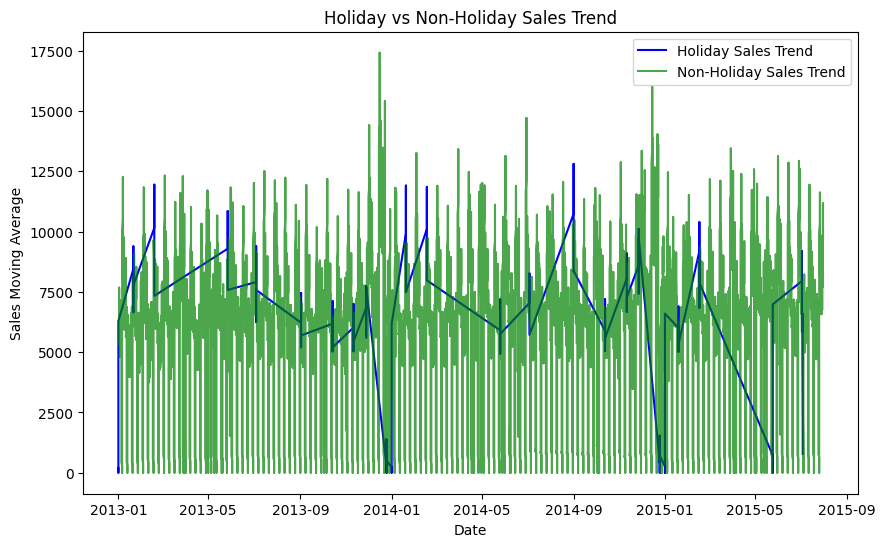

In [42]:
# Compare holiday vs non-holiday sales trends
compare_holiday_non_holiday_sales(df_Train)

### correlation between sales and the number of customers

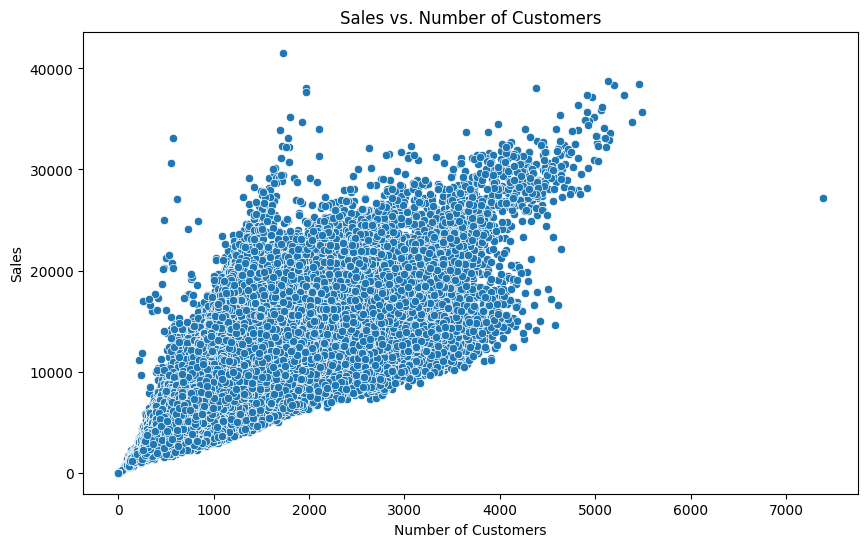

In [43]:
analyze_sales_customers_relationship(df_Train)

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


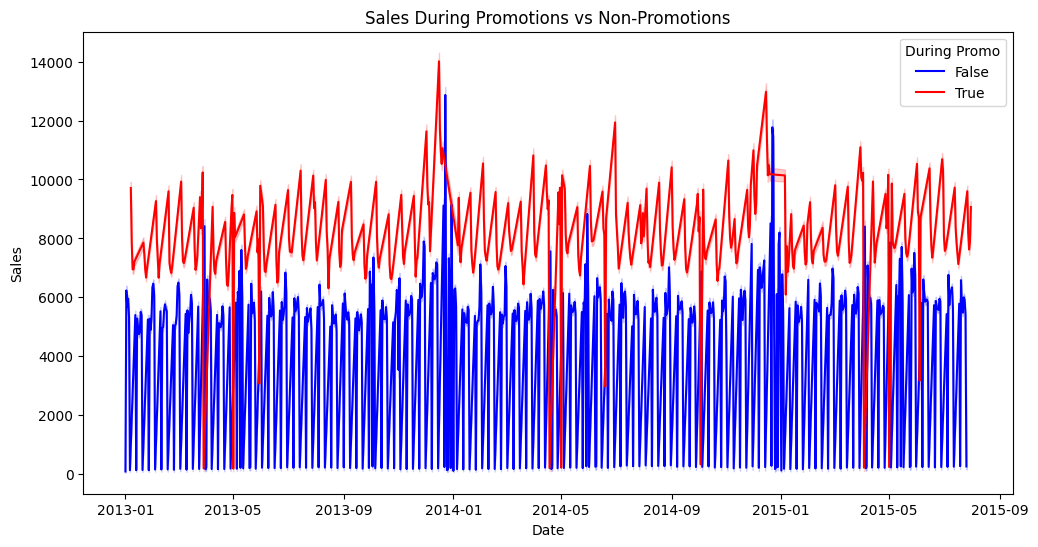

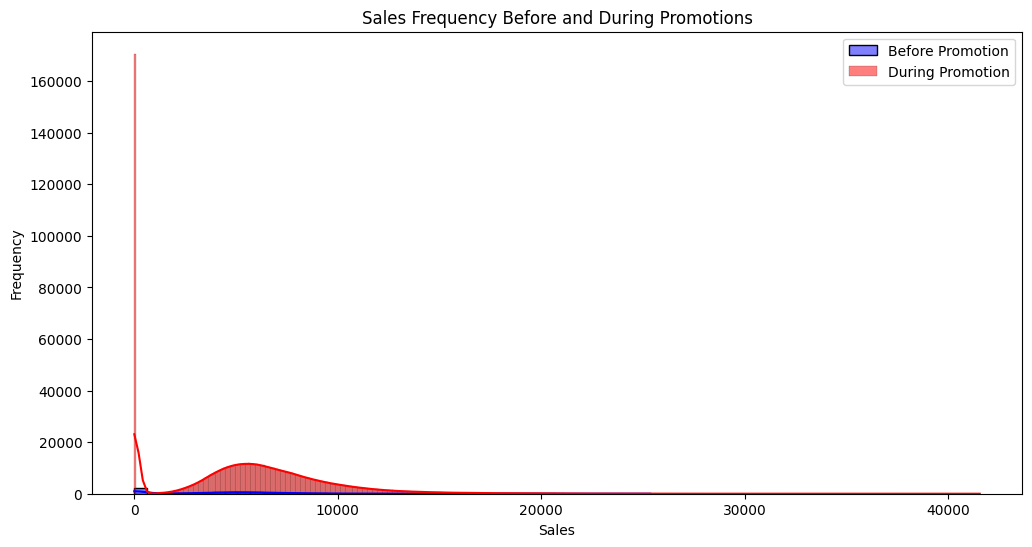

In [44]:
analyze_promotions(df_Train)


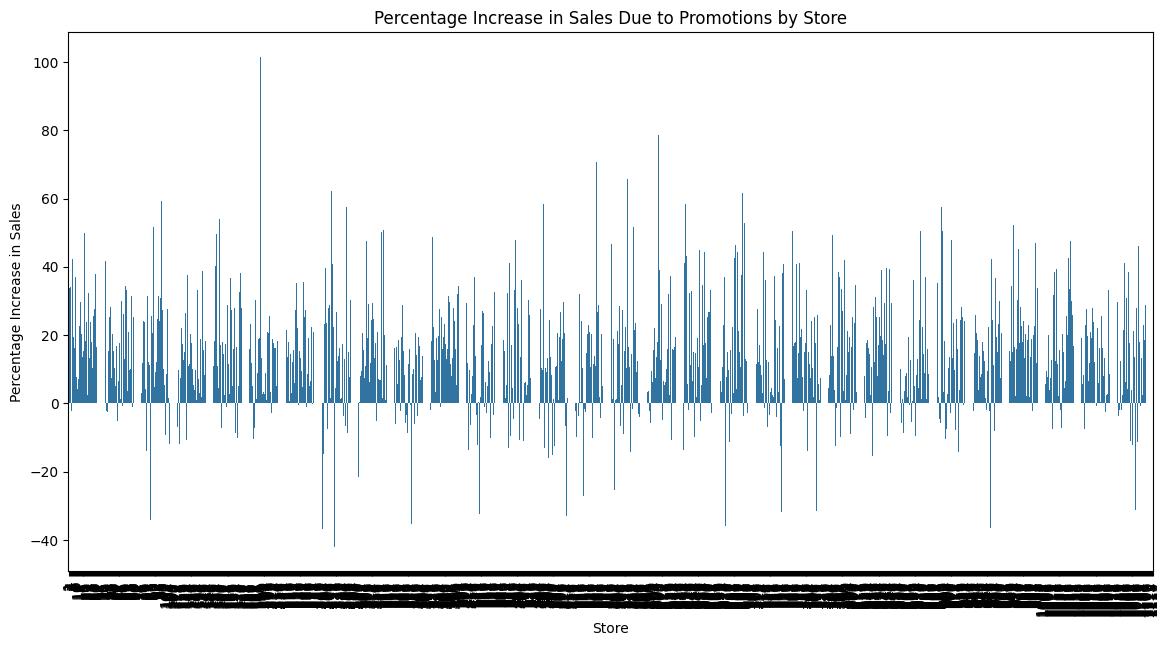

In [45]:
analyze_store_promotions(df_Train)


### Code to Analyze Trends Based on Store Opening/Closing Times:

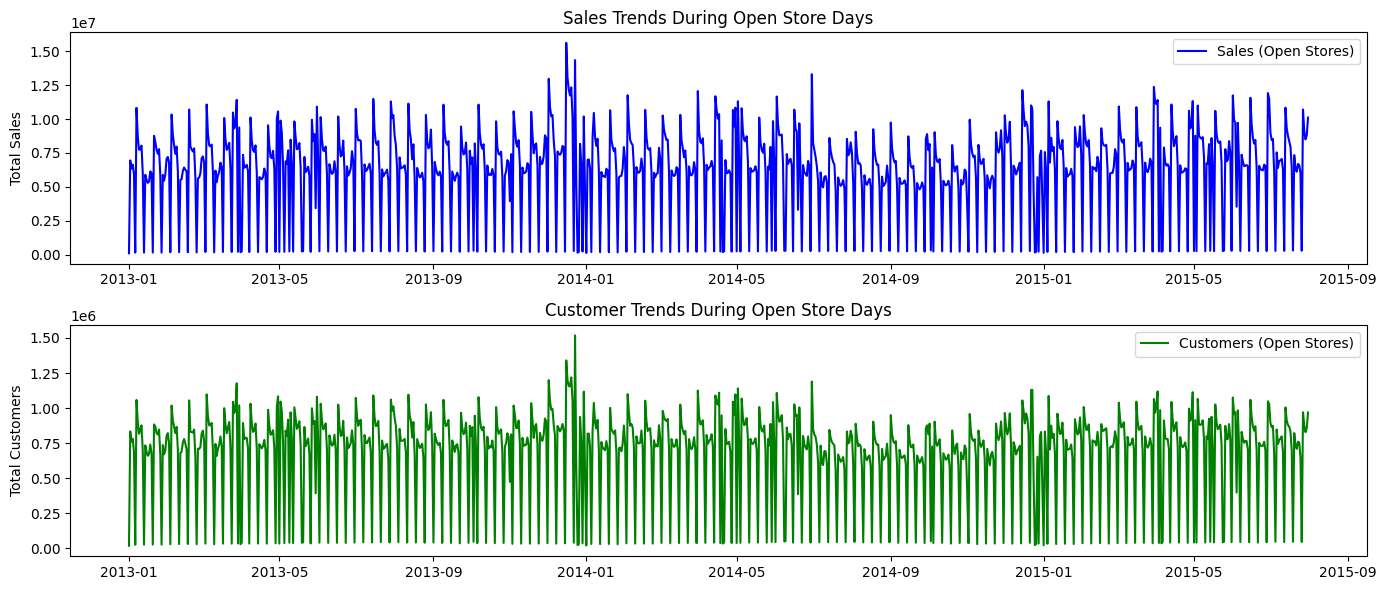

In [46]:
analyze_open_store_trends(df_Train)

### Comparison Between Open and Closed Stores on weekends

In [47]:
analyze_weekday_open_stores_weekend_sales(df_Train)

### Daily Trends

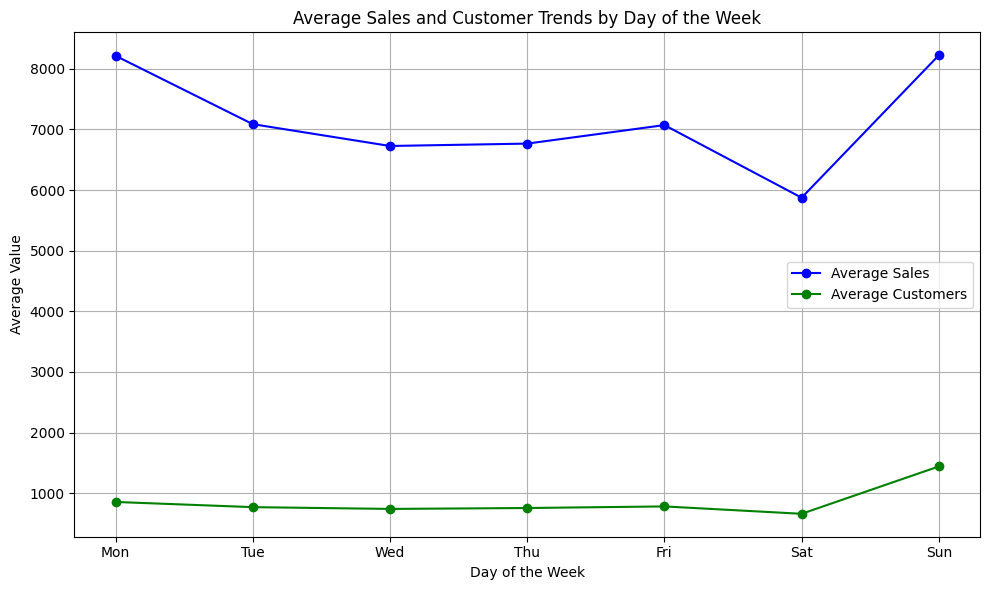

In [48]:
open_stores = df_Train[df_Train['Open'] == 1]

analyze_sales_customers_by_day(open_stores)

 ### Impact of Promotions

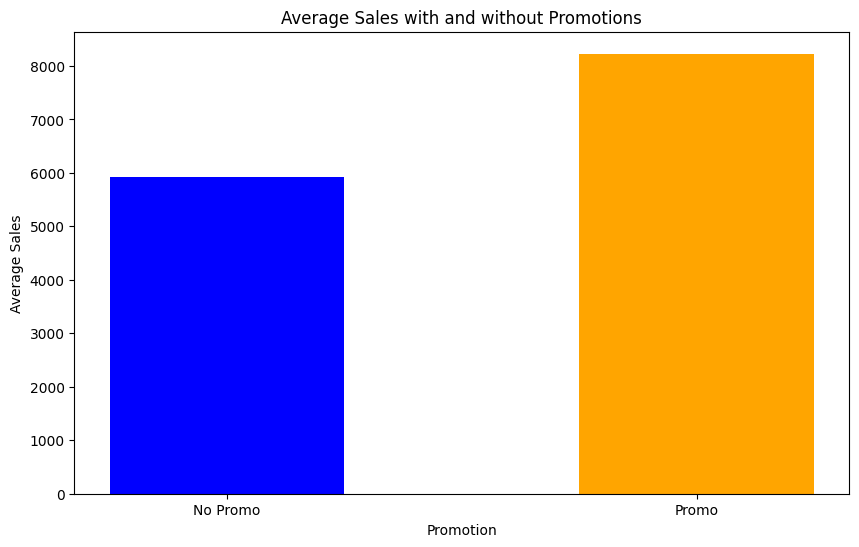

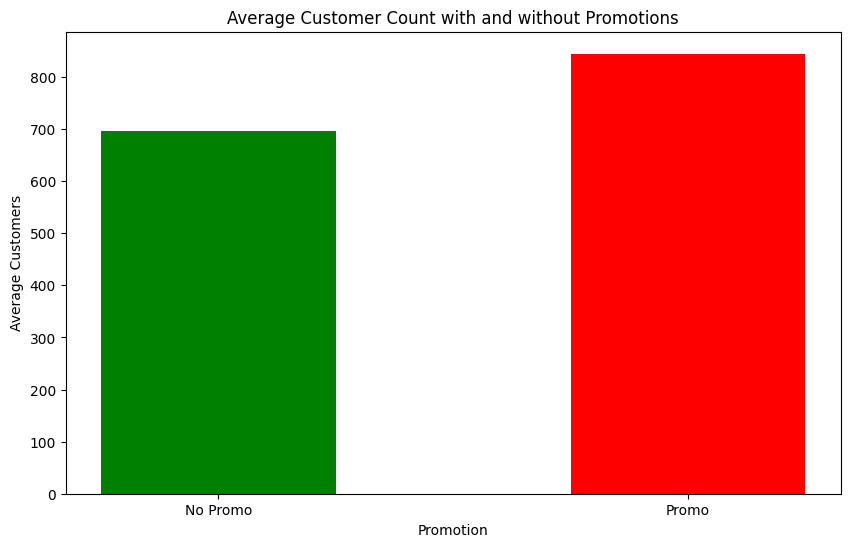

In [49]:
analyze_promo_impact(open_stores)

### Identify Stores Open on All Weekdays

In [50]:
stores_open_all_weekdays = get_stores_open_all_weekdays(df_Train)
print(f"Stores open on all weekdays: {stores_open_all_weekdays}")

Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

### Analyze Weekend Sales

In [51]:
sales_comparison = compare_weekend_weekday_sales(df_Train, stores_open_all_weekdays)
print(sales_comparison)

       Weekday Sales  Weekend Sales
Store                              
1        4531.893175    2471.485075
2        5191.189911    1436.552239
3        7142.461424    2217.320896
4        9200.749258    5056.723881
5        4991.421365    1039.552239
...              ...            ...
1111     5416.004451    1644.361940
1112    10123.017804    4296.194030
1113     6537.838279    2946.787313
1114    19678.379822   10967.750000
1115     5956.372404    3386.694030

[1115 rows x 2 columns]


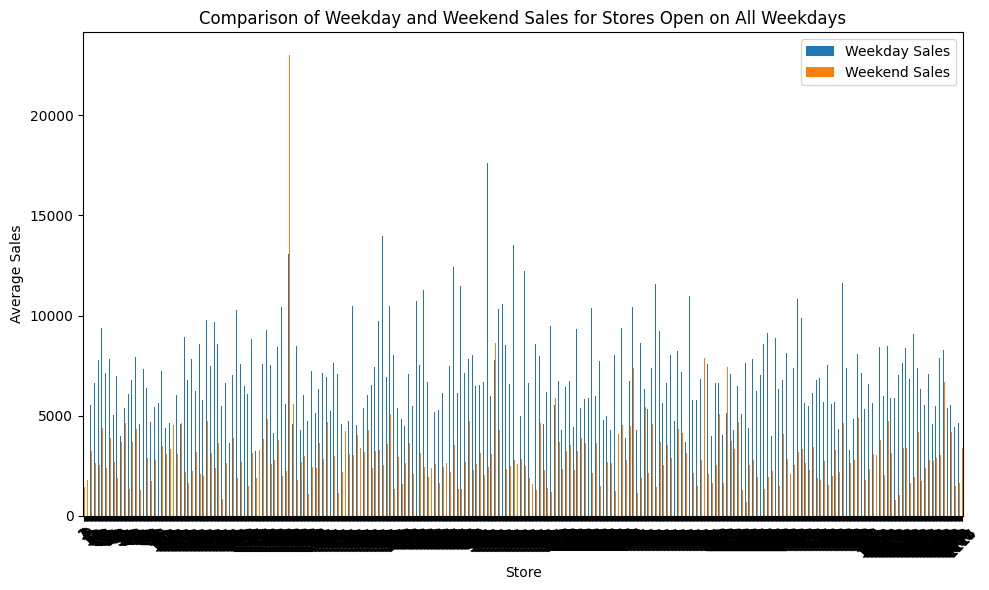

In [52]:
plot_sales_comparison(sales_comparison)

### Merging the DataFrames

In [53]:
df_merged = pd.merge(df_Train, df_store[['Store', 'Assortment']], on='Store')
df_merged.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IsHoliday,Trend,Seasonal,Sales_MA,DuringPromo,Assortment
0,1,5,5263,555,1,1,0,1,False,NaN,-16.373981,NaN,True,a
1,2,5,6064,625,1,1,0,1,False,NaN,96.710885,NaN,True,a
2,3,5,8314,821,1,1,0,1,False,NaN,-8.111870,NaN,True,a
3,4,5,13995,1498,1,1,0,1,False,NaN,-35.421425,NaN,True,c
4,5,5,4822,559,1,1,0,1,False,NaN,-50.278884,NaN,True,a


### Analyzing the Effect of Assortment on Sales

In [54]:
# Group by 'Assortment' and calculate the mean sales
sales_by_assortment = df_merged.groupby('Assortment')['Sales'].mean()               
# Print the results
print(sales_by_assortment)


Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


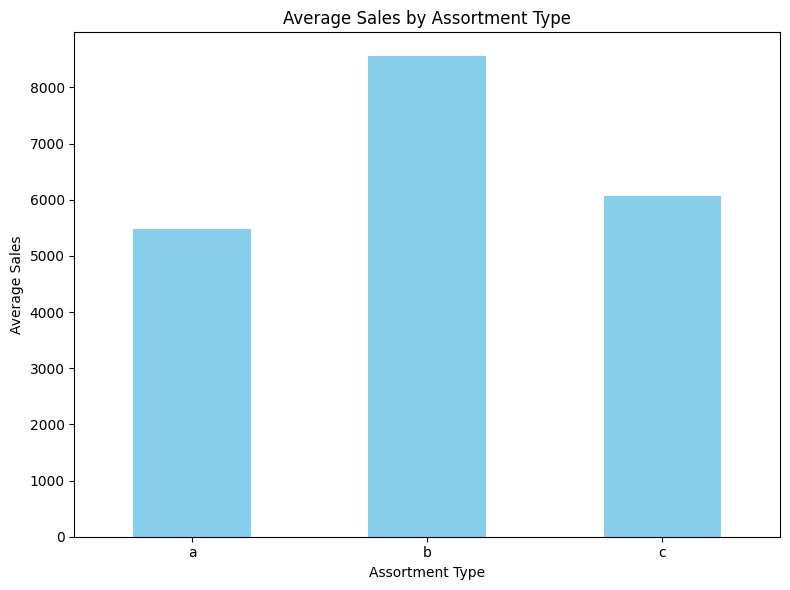

In [55]:
sales_by_assortment = df_merged.groupby('Assortment')['Sales'].mean()
plot_average_sales_by_assortment(sales_by_assortment)

### Impact of Competition Distance on Sales

In [56]:
df_merged_clean = pd.merge(df_Train, df_store, on='Store')
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   IsHoliday                  1017209 non-null  bool   
 9   Trend                      1016845 non-null  float64
 10  Seasonal                   1017209 non-null  float64
 11  Sales_MA                   1017180 non-null  float64
 12  DuringPromo                1017209 non-null  bool   
 13  StoreType   

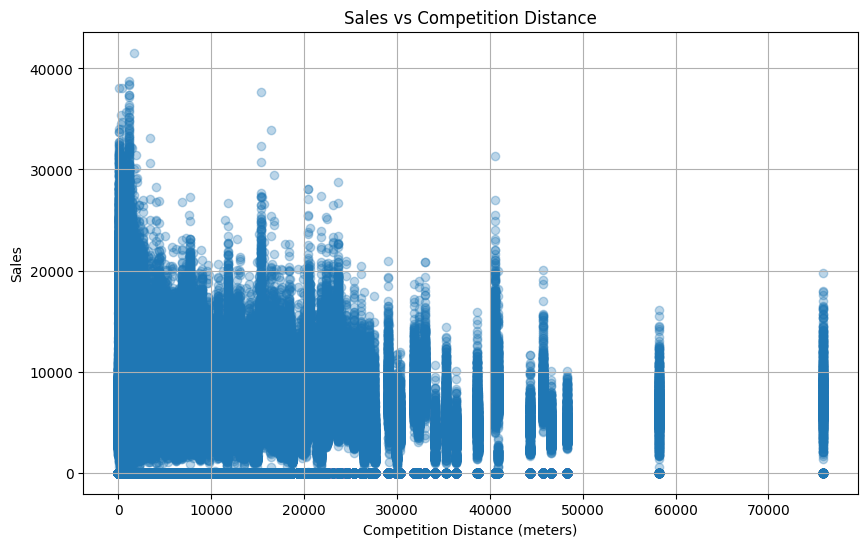

In [57]:
analyze_competition_distance(df_merged_clean)

### Does Competition Distance Matter in City Centers

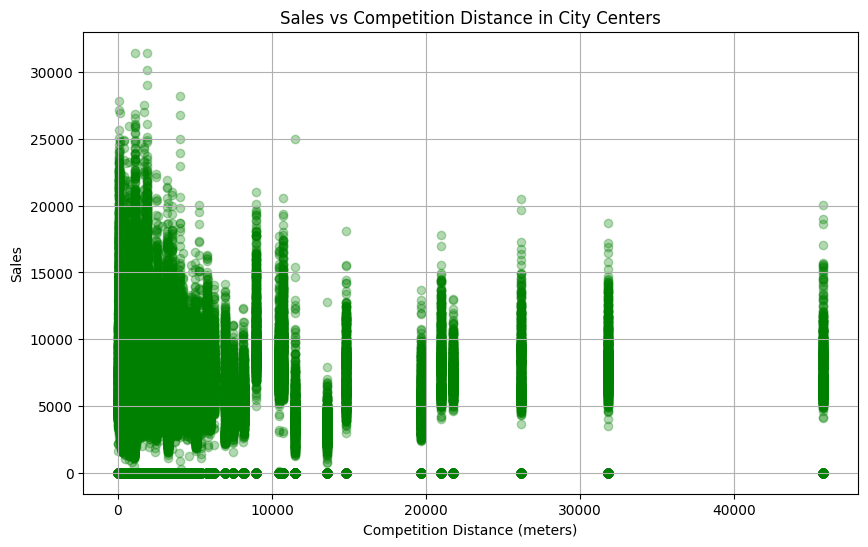

In [58]:
analyze_city_center_sales(df_merged_clean)

###  Stores with Changing CompetitionDistance

In [59]:
analyze_competitor_impact(df_merged_clean)

## Feature engineering

In [60]:
df_Train = df_Train.reset_index()
df_merged_2 = pd.merge(df_Train, df_store, on='Store')
df_merged_2.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IsHoliday,Trend,Seasonal,Sales_MA,DuringPromo,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,False,NaN,-16.373981,NaN,True,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,2015-07-31,2,5,6064,625,1,1,0,1,False,NaN,96.710885,NaN,True,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,False,NaN,-8.111870,NaN,True,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,False,NaN,-35.421425,NaN,True,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,2015-07-31,5,5,4822,559,1,1,0,1,False,NaN,-50.278884,NaN,True,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [61]:
df_merged_2 = create_features(df_merged_2)

In [62]:
df_merged_2.drop(columns=[ 'Date'], inplace=True)


In [63]:
columns_scaler = ["DayOfWeek", "Sales", "Customers", "Trend", "Seasonal", "Sales_MA", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "Month", "WeekOfYear", "DayOfMonth", "Sales_Lag_1", "Sales_Lag_7", "PromoDuration", "PromoEffectiveness", "SalesPerCustomer", "Customer_Lag_1", "Customer_Lag_7", "CompetitorDistanceInteraction" ]
df_standard = Scaler(df_merged_2, columns_scaler)
df_standard

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IsHoliday,Trend,Seasonal,Sales_MA,DuringPromo,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,WeekOfYear,DayOfMonth,IsWeekend,HolidayImpact,Sales_Lag_1,Sales_Lag_7,PromoDuration,PromoEffectiveness,SalesPerCustomer,Customer_Lag_1,Customer_Lag_7,CompetitorDistanceInteraction
0,1,0.501484,-0.132683,-0.168269,1,1,0,1,False,NaN,-0.311117,NaN,True,c,a,-0.538486,0.554999,-0.087676,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",0.346724,0.511626,1.740766,False,True,NaN,NaN,-1.737263,-0.132683,-0.004886,NaN,NaN,-0.215109
1,2,0.501484,0.075373,-0.017540,1,1,0,1,False,NaN,1.837585,NaN,True,a,a,-0.629300,1.182454,-0.238462,1,-0.964188,-1.586056,"Jan,Apr,Jul,Oct",0.346724,0.511626,1.740766,False,True,-0.132684,NaN,-1.737263,0.075373,0.095009,-0.168270,NaN,-0.007545
2,3,0.501484,0.659800,0.404499,1,1,0,1,False,NaN,-0.154130,NaN,True,a,a,1.129901,1.496182,-0.389248,1,-0.864120,-0.740722,"Jan,Apr,Jul,Oct",0.346724,0.511626,1.740766,False,True,0.075372,NaN,-1.737263,0.659800,0.288081,-0.017542,NaN,-0.328749
3,4,0.501484,2.135414,1.862258,1,1,0,1,False,NaN,-0.673033,NaN,True,c,c,-0.622813,0.554999,0.063110,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",0.346724,0.511626,1.740766,False,True,0.659799,NaN,-1.737263,2.135414,-0.068789,0.404498,NaN,0.373866
4,5,0.501484,-0.247231,-0.159656,1,1,0,1,False,NaN,-0.955336,NaN,True,a,a,3.177113,-1.013639,0.967824,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",0.346724,0.511626,1.740766,False,True,2.135414,NaN,-1.737263,-0.247231,-0.394768,1.862257,NaN,-0.342402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,-1.000476,-1.499723,-1.363330,0,0,a,1,True,NaN,-1.460699,-1.918919,False,a,a,-0.456753,-0.386184,0.817038,1,0.837049,0.949946,"Jan,Apr,Jul,Oct",-1.457193,-1.566890,-1.673123,False,True,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017205,1112,-1.000476,-1.499723,-1.363330,0,0,a,1,True,NaN,-0.801576,-1.918919,False,c,c,-0.459348,-1.013639,-0.389248,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",-1.457193,-1.566890,-1.673123,False,True,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017206,1113,-1.000476,-1.499723,-1.363330,0,0,a,1,True,NaN,1.883724,-1.918919,False,a,c,0.498094,-1.013639,-0.389248,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",-1.457193,-1.566890,-1.673123,False,True,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017207,1114,-1.000476,-1.499723,-1.363330,0,0,a,1,True,NaN,-0.099059,-1.918919,False,a,c,-0.590380,-1.013639,-0.389248,0,-0.063570,0.104612,"Jan,Apr,Jul,Oct",-1.457193,-1.566890,-1.673123,False,True,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554


In [64]:
columns_label = ["StateHoliday", "IsHoliday", "DuringPromo", "StoreType", "Assortment", "PromoInterval", "IsWeekend", "HolidayImpact" ]
df_labelEncoded = labelEncoder(df_standard, columns_label)
df_labelEncoded

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IsHoliday,Trend,Seasonal,Sales_MA,DuringPromo,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,WeekOfYear,DayOfMonth,IsWeekend,HolidayImpact,Sales_Lag_1,Sales_Lag_7,PromoDuration,PromoEffectiveness,SalesPerCustomer,Customer_Lag_1,Customer_Lag_7,CompetitorDistanceInteraction
0,1,0.501484,-0.132683,-0.168269,1,1,0,1,0,NaN,-0.311117,NaN,1,2,0,-0.538486,0.554999,-0.087676,0,-0.063570,0.104612,1,0.346724,0.511626,1.740766,0,1,NaN,NaN,-1.737263,-0.132683,-0.004886,NaN,NaN,-0.215109
1,2,0.501484,0.075373,-0.017540,1,1,0,1,0,NaN,1.837585,NaN,1,0,0,-0.629300,1.182454,-0.238462,1,-0.964188,-1.586056,1,0.346724,0.511626,1.740766,0,1,-0.132684,NaN,-1.737263,0.075373,0.095009,-0.168270,NaN,-0.007545
2,3,0.501484,0.659800,0.404499,1,1,0,1,0,NaN,-0.154130,NaN,1,0,0,1.129901,1.496182,-0.389248,1,-0.864120,-0.740722,1,0.346724,0.511626,1.740766,0,1,0.075372,NaN,-1.737263,0.659800,0.288081,-0.017542,NaN,-0.328749
3,4,0.501484,2.135414,1.862258,1,1,0,1,0,NaN,-0.673033,NaN,1,2,2,-0.622813,0.554999,0.063110,0,-0.063570,0.104612,1,0.346724,0.511626,1.740766,0,1,0.659799,NaN,-1.737263,2.135414,-0.068789,0.404498,NaN,0.373866
4,5,0.501484,-0.247231,-0.159656,1,1,0,1,0,NaN,-0.955336,NaN,1,0,0,3.177113,-1.013639,0.967824,0,-0.063570,0.104612,1,0.346724,0.511626,1.740766,0,1,2.135414,NaN,-1.737263,-0.247231,-0.394768,1.862257,NaN,-0.342402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,-1.000476,-1.499723,-1.363330,0,0,1,1,1,NaN,-1.460699,-1.918919,0,0,0,-0.456753,-0.386184,0.817038,1,0.837049,0.949946,1,-1.457193,-1.566890,-1.673123,0,1,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017205,1112,-1.000476,-1.499723,-1.363330,0,0,1,1,1,NaN,-0.801576,-1.918919,0,2,2,-0.459348,-1.013639,-0.389248,0,-0.063570,0.104612,1,-1.457193,-1.566890,-1.673123,0,1,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017206,1113,-1.000476,-1.499723,-1.363330,0,0,1,1,1,NaN,1.883724,-1.918919,0,0,2,0.498094,-1.013639,-0.389248,0,-0.063570,0.104612,1,-1.457193,-1.566890,-1.673123,0,1,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554
1017207,1114,-1.000476,-1.499723,-1.363330,0,0,1,1,1,NaN,-0.099059,-1.918919,0,0,2,-0.590380,-1.013639,-0.389248,0,-0.063570,0.104612,1,-1.457193,-1.566890,-1.673123,0,1,-1.499725,-1.49974,1.799498,-1.499723,NaN,-1.363332,-1.363343,-0.347554


In [65]:
df_cleaned = df_labelEncoded.dropna()


In [68]:
# Make 'Store' column the index
df_cleaned.set_index('Store', inplace=True)

# Save the cleaned dataset to a CSV file
df_cleaned.to_csv(r"C:\Users\ephre\Documents\Rossmann-Pharmaceuticals-Finance-1\Data\Preprocessed_Data\preprocessed_dataset.csv")
